# COSADAMA Introduction to Data Science Study

- 작성자: 조용주
- 참고자료: 2020년 코사다마 데이터 분석 커리큘럼(박하람), 파이썬으로 데이터 주무르기(민형기), 점프 투 파이썬(박응용), 파이썬 입문과 크롤링 기초 부트캠프(잔재미코딩)
- 교재: 158 - 166쪽 (깃헙 교안으로 공부하면서, 궁금한 부분은 교재를 참고하세요. 혹은 깃헙 교안을 다 보고 교재를 복습 겸 읽어봐도 됩니다!)

## 네이버 영화 크롤링

'네이버 영화 크롤링'에서는 네이버 영화 사이트에서 영화 제목, 평점, 일자까지 가져와 영화를 평점 순대로 시각화해보고, 일자에 따라 평점이 변화는지까지도 살펴보려 합니다. BeautifulSoup과 urllib을 다시 활용해보고 matplotlib으로 시각화까지 하려 합니다. 

### urllib과 BeautifulSoup으로 사이트에 접근하기 

urllib과 BeautifulSoup으로 네이버 영화 평점 순 배열이 되어 있는 사이틀를 가져오려 합니다. 우리가 가져올 것은 영화의 이름, 평점, 날짜입니다.

- [네이버 영화](https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200327) 

필요한 모듈을 가져오기에 앞서, 한글깨짐 현상 먼저 처리하고 가볼까요?

- 한글깨짐 방지: Colab의 경우
(추가 참고 자료: [Colab 한글깨짐 현상 해결방법](https://teddylee777.github.io/colab/colab-korean))

In [ ]:
# step1
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# step2
# 실행 후 런타임 다시 시작 (필수)
# step3
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


- 한글깨짐 방지: Jupyter notebook의 경우

In [ ]:
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

이제 필요한 모듈을 import 해 봅시다.

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen
import pandas as pd

그럼 해당 사이트의 html을 가져오기 위해서 필요한 기본적인 작업들을 가져와 봅시다.

In [ ]:
url_base = 'https://movie.naver.com/'
url_syb = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20200102' # 코사다마 탄생일

page = url_base+url_syb
headers = {'User-Agent': 'Mozilla/5.0'}
res = urllib.request.Request(page, headers =headers)
html = urlopen(res).read()
soup = BeautifulSoup(html, 'html.parser')
# soup

잘 가져온 것 같네요ㅎㅎ 그러면 이제 다시 크롬 개발자 도구를 켜서 우리가 필요로 하는 정보들의 태그가 어디에 있는지 확인하는 것이 중요하겠죠. 이름이 어디있나 봤더니 div 태그의 class tit5에 있습니다. (직접 찾아보는 것, 잊지마세요!)

In [ ]:
soup.find_all('div', class_='tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189111" title="두 교황">두 교황</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190395" title="눈의 여왕4">눈의 여왕4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190244" title="러브 앳">러브 앳</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=150376" title="나, 다니엘 블레이크">나, 다니엘 블레이크</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189000" title="나이브스 아웃">나이브스 아웃</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=19031" title="러브레터">러브레터</a>
 </div>, <

잘 가져왔네요! 그럼 제목만 가져와보겠습니다. 우선 리스트를 벗기고, 첫번째 제목부터 가져와보도록 하죠.

In [ ]:
soup.find_all('div', class_='tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
</div>

In [ ]:
soup.find_all('div', class_='tit5')[0].a['title']

'포드 V 페라리'

In [ ]:
soup.find_all('div', class_='tit5')[0].a.string

'포드 V 페라리'

이렇게 string을 써서도 가져올 수 있습니다. 그 다음은 평점을 가져와 볼게요! tag가 무엇인지 꼭 확인해보세요.

In [ ]:
soup.find_all('td', class_='point')[0].string

'9.56'

날짜에 따라 달라지는 평점을 보고 싶기 때문에, 날짜를 판다스로 만들어 주려고 합니다. 날짜를 만덜어 주는 함수는 date_range입니다.

2020-01-02부터 시작해 총 100일의 날짜를 생성하였습니다. freq에 무엇이 들어가냐에 따라 출력되는 날이 달라져요. 'D'는 일(day)이고, 시간까지 함께 뽑고 싶다면 'H'를 적어주면 됩니다. 그 외에도 다양한 것들이 있어요.

In [ ]:
date = pd.date_range('2020-01-02', periods=100, freq='D')
date

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
      

### 100 페이지 크롤링 하기

그럼 해당 정보들이 모두 어디에 담겨져 있는지 알았으니, 이를 이제 가져와야 하겠죠. 그 전에 urllib.parse.quote에 대해 알아볼 것인데요.

In [ ]:
import urllib 

url = urllib.parse.quote('파이썬')
url

'%ED%8C%8C%EC%9D%B4%EC%8D%AC'

이렇게 urllib.parse.quote는 텍스트(한글이나 숫자)를 url에 적합한 용어로 바꿔주는 것을 의미합니다. 이것이 왜 필요하냐면, url 주소에 날짜가 적혀있으므로 날짜를 용이하게 바꿔주면서 크롤링 하기 위해서에요. 

- https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200327

지난 시간에 했던 것이 기억날 것 같은데요, 여기에 맨 뒤 date를 변경해보세요. 그러면 그 일자에 맞춰서 영화 평점 순이 바뀌게 됩니다. 앞서 만들어둔 date를 활용해 url을 변경해주어 총 100 페이지에서 크롤링을 해올 것이랍니다.

In [ ]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

date = pd.date_range('2020-01-02', periods=100, freq='D')

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


그냥 data를 quote에 넣어주면 error가 뜨는데요, url 날짜 양식에 맞도록 형식을 저장해주는 것이 필요합니다. 형식에 맞춰서 년-월-일이 나타나도록 해주는 것이 .surftime이에요.

또한 여기서는 append가 아닌 extend()를 사용했죠. 차이점은 아래 링크를 보시면 됩니다. 
- [extend()와 append()의 차이점](https://hashcode.co.kr/questions/23/파이썬에-append와-extend의-차이점)

그럼 잘 가져와졌는지 확인해보겠습니다.

In [ ]:
movie_date[:5]

[Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D')]

In [ ]:
movie_name[:5]

['포드 V 페라리', '주전장', '두 교황', '눈의 여왕4', '러브 앳']

In [ ]:
movie_point[:5]

['9.56', '9.53', '9.36', '9.28', '9.27']

날짜, 영화 이름, 영화 평점까지 모두 잘 가져왔습니다. 이것을 이제 dataframe에 담아 가공하기 좋게 넣어보죠.

In [ ]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name,
                     'point':movie_point})
movie.head(10)

,date,name,point
0,2020-01-02,포드 V 페라리,9.56
1,2020-01-02,주전장,9.53
2,2020-01-02,두 교황,9.36
3,2020-01-02,눈의 여왕4,9.28
4,2020-01-02,러브 앳,9.27
5,2020-01-02,교회오빠,9.27
6,2020-01-02,"나, 다니엘 블레이크",9.27
7,2020-01-02,피아니스트의 전설,9.25
8,2020-01-02,나이브스 아웃,9.14
9,2020-01-02,러브레터,9.11


여기에는 날짜 별로 영화들이 담겨있어요. 날짜가 아닌 영화별로 점수를 보고 싶다면, pivot_table을 활용하면 됩니다. 여러 날짜에 동일한 영화들이 있으니, 평점은 점수의 평균으로 합쳐보겠습니다. (교재는 합산이지만 저는 평균이 더 낫겠다 생각했어요. 합산으로 할 경우 영화가 걸린 일 수에 영향을 많이 받으니까요) 

In [ ]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

DataError: ignored

어, 이렇게 하니 오류가 뜹니다. 왜 일까요? 오류를 읽어보니 'No numeric types to aggregate'라고 하죠? 그렇다는 얘기는 계산할 수 있는 숫자가 아니라는 얘깁니다. 그러면 point 컬럼의 자료형이 뭔지 볼게요.

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4592 non-null   datetime64[ns]
 1   name    4592 non-null   object        
 2   point   4592 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 107.8+ KB


보니까 point는 object라 계산이 안되었군요. 사실 앞의 13번 코드를 보면 이미 숫자로 출력되지 않은 것을 알 수 있습니다. 그럼 point를 숫자로 바꾸어줘야 계산이 되겠죠. 아래와 같이 바꾸어 주면 됩니다.

In [ ]:
movie['point'] = movie['point'].astype('float64')

In [ ]:
movie['point'].sum()

38910.73

이제 잘 계산이 되네요. 그럼 다시 pivot_table을 해보죠.

In [ ]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head(10)

,point
name,
그린 북,9.604286
포드 V 페라리,9.519667
주전장,9.518500
원더,9.488947
살인의 추억,9.400000
포레스트 검프,9.390000
스파이 지니어스,9.375517
쉰들러 리스트,9.345333
두 교황,9.342045


오호라, 잘 되었습니다. ['그린 북'](https://movie.naver.com/movie/bi/mi/basic.nhn?code=171539)과 ['주전장'](https://movie.naver.com/movie/bi/mi/basic.nhn?code=179518), ['원더'](https://movie.naver.com/movie/bi/mi/basic.nhn?code=151196)의 평점이 높네요. ['포드 V 페라리'](https://movie.naver.com/movie/bi/mi/basic.nhn?code=181710)도 평점이 높습니다. 그럼 저는 당시 이슈가 되었던 '82년생 김지영' 영화의 평점을 가져와 보겠습니다.

- [pandas query 함수](https://kongdols-room.tistory.com/120)

query 함수를 사용해 볼 것인데요, query는 조건식을 문자열로 입력 받아 해당 조건에 만족하는 행을 추출해주는 함수에요. 불린 인덱싱과 기능이 비슷하나, query가 방대한 양의 데이터를 처리할 때 성능면에서 더 우위가 높다고 해요.

In [ ]:
tmp = movie.query('name == ["82년생 김지영"]')
tmp.tail()

,date,name,point
2220,2020-02-21,82년생 김지영,6.69
2262,2020-02-22,82년생 김지영,6.69
2305,2020-02-23,82년생 김지영,6.69
2348,2020-02-24,82년생 김지영,6.69
2392,2020-02-25,82년생 김지영,6.69


6.69로 낮은 평점을 기록했네요. 저는 불린 인덱싱으로 '메기' 영화도 한 번 평점을 봤습니다.

In [ ]:
movie.loc[movie['name'] == '메기', ['name','point']]

,name,point
24,메기,8.27
61,메기,8.27
98,메기,8.27
135,메기,8.27
172,메기,8.27
...,...,...
3782,메기,8.28
3831,메기,8.28
3889,메기,8.28
3940,메기,8.27


비교적 높은 것을 확인할 수 있습니다.

### 영화별 날짜 변화에 따른 평점 변화 시각화 

이제는 날짜에 따라서 영화의 평점 변화가 어떻게 나타나는지 확인해보려고 해요.
먼저 맛보기로 '82년생 김지영'의 평점을 시각화해보겠습니다.

No handles with labels found to put in legend.


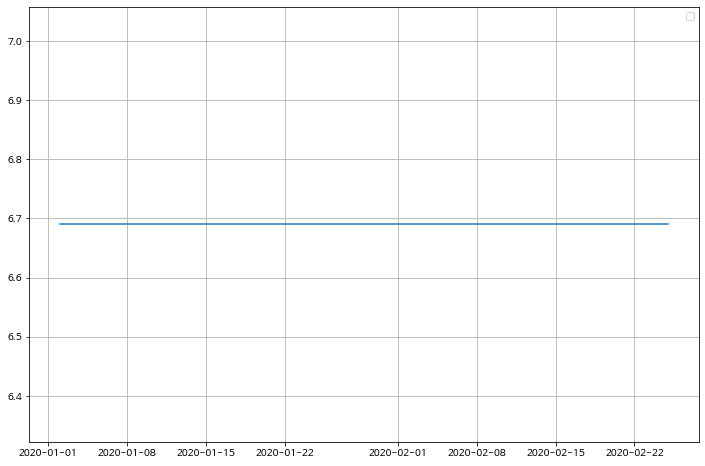

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

6.69로 일정한 것을 확인할 수 있습니다.

pivot_table을 활용해 저희가 크롤링한 시기의 영화들의 평점 변화를 시각화 해볼게요.

In [ ]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head(10)

point                          ...                          
name        1917 21 브릿지: 테러 셧다운 500일의 썸머  ... 흑집사 : 북 오브 더 아틀란틱  히트 히트맨
date                                      ...                          
2020-01-02   NaN            NaN      NaN  ...               NaN NaN NaN
2020-01-03   NaN            NaN      NaN  ...               NaN NaN NaN
2020-01-04   NaN            NaN      NaN  ...               NaN NaN NaN
2020-01-05   NaN            NaN      NaN  ...               NaN NaN NaN
2020-01-06   NaN            NaN      NaN  ...               NaN NaN NaN
2020-01-07   NaN            NaN      NaN  ...               NaN NaN NaN
2020-01-08   NaN           8.02      NaN  ...               NaN NaN NaN
2020-01-09   NaN           8.02      NaN  ...               NaN NaN NaN
2020-01-10   NaN           8.06      NaN  ...               NaN NaN NaN
2020-01-11   NaN           8.02      NaN  ...               NaN NaN NaN

[10 rows x 191 columns]

헉... 결측값이 상당히 많네요. 이게 네이버 평점을 매기는 기준을 보니까 '전국기준 현재 상영되고 있는 영화 중 평점 응답자가 300명 이상인 경우'이라고 하더라구요. 이것에 걸리는 것도 있겠고, 평점이 이 시기에 안 매겨지는 경우도 있을 수 있구요. 다양한 이유들이 있습니다.

- [droplevel()](https://www.w3resource.com/pandas/series/series-droplevel.php)

droplevel은 원하는 컬럼이나 인덱스 전체를 drop해주는 건데, 여기서 왜 해준지 도무지 모르겠어요... (아시는 분은 알려주시면 감사하겠습니다.) 

In [ ]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,1917,21 브릿지: 테러 셧다운,500일의 썸머,82년생 김지영,"가장 따뜻한 색, 블루",걸어도 걸어도,겟 아웃,겨울왕국 2,결혼 이야기,고양이를 빌려드립니다,공기인형,교회오빠,그것만이 내 세상,그녀,그녀에게,그랜드 부다페스트 호텔,그렇게 아버지가 된다,그린 북,그을린 사랑,극장판 원피스 스탬피드,극장판 쿠로코의 농구 라스트 게임,극한직업,기생충,김군,김복동,꾸뻬씨의 행복여행,끝까지 간다,"나, 다니엘 블레이크",나쁜 녀석들 : 포에버,나이브스 아웃,날씨의 아이,남산의 부장들,내부자들,내일을 위한 시간,너의 이름은.,노팅 힐,눈의 여왕2: 트롤의 마법거울,눈의 여왕4,다크 워터스,닥터 두리틀,...,졸업,종이 달,주디,주전장,쥬만지: 넥스트 레벨,지푸라기라도 잡고 싶은 짐승들,진짜로 일어날지도 몰라 기적,찬실이는 복도 많지,천로역정: 천국을 찾아서,천문: 하늘에 묻는다,철벽선생,첫 키스만 50번째,카센타,캐롤,캣츠,케빈에 대하여,클로젯,킹 오브 프리즘,킹 오브 프리즘 -샤이니 세븐 스타즈-,킹 오브 프리즘 프라이드 더 히어로,타오르는 여인의 초상,태풍이 지나가고,테이큰,트루먼 쇼,파리로 가는 길,파이트 클럽,포드 V 페라리,포레스트 검프,피아니스트 세이모어의 뉴욕 소네트,피아니스트의 전설,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스,해리 포터와 아즈카반의 죄수,해치지않아,핵소 고지,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히트,히트맨
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,6.69,NaN,NaN,NaN,8.71,9.10,NaN,NaN,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.49,NaN,NaN,NaN,NaN,9.27,NaN,9.14,7.89,NaN,NaN,NaN,NaN,NaN,NaN,9.28,NaN,NaN,...,NaN,NaN,NaN,9.53,6.12,NaN,NaN,NaN,NaN,8.86,NaN,NaN,NaN,NaN,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN,9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,6.69,NaN,NaN,NaN,8.71,9.09,NaN,NaN,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.49,NaN,NaN,NaN,NaN,9.27,NaN,9.14,7.89,NaN,NaN,NaN,NaN,NaN,NaN,9.28,NaN,NaN,...,NaN,NaN,NaN,9.53,6.12,NaN,NaN,NaN,NaN,8.86,NaN,NaN,NaN,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN,9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,6.69,NaN,NaN,NaN,8.71,9.09,NaN,NaN,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.49,NaN,NaN,NaN,NaN,9.27,NaN,9.14,7.89,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,NaN,...,NaN,NaN,NaN,9.53,6.13,NaN,NaN,NaN,NaN,8.85,NaN,NaN,NaN,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN,9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,6.69,NaN,NaN,NaN,8.71,9.07,NaN,NaN,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.49,NaN,NaN,NaN,NaN,9.27,NaN,9.15,7.89,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,NaN,...,NaN,NaN,NaN,9.53,6.12,NaN,NaN,NaN,NaN,8.84,NaN,NaN,NaN,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.55,NaN,NaN,9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,6.69,NaN,NaN,NaN,8.71,9.07,NaN,NaN,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.49,NaN,NaN,NaN,NaN,9.27,NaN,9.15,7.90,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,NaN,...,NaN,NaN,NaN,9.53,6.13,NaN,NaN,NaN,NaN,8.84,NaN,NaN,NaN,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.55,NaN,NaN,9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


아무튼 이제 시간에 따른 평점 시각화를 해봅시다. 저는 '82년생 김지영', '벌새', '메기', '기생충'의 평점을 확인해볼게요. '기생충'은 워낙 유명하고 평이 좋으니 다른 영화와 평점을 비교해보기 위해 넣어봤습니다.

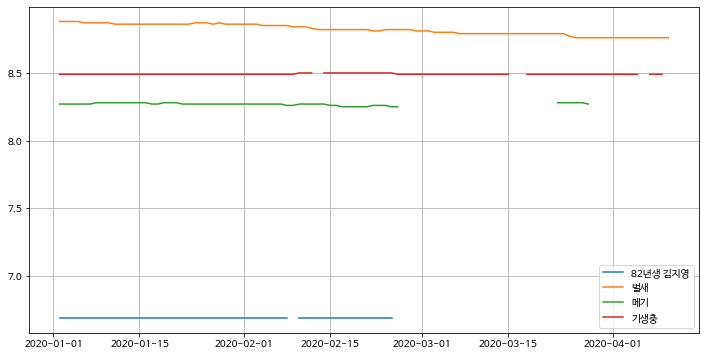

In [ ]:
target_col = ['82년생 김지영', '벌새', '메기', '기생충']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

다른 그래프들과 비교했을 때 '82년생 김지영'은 확실히 별점이 낮은 편이네요. '메기'와 '벌새'는 평점이 높은 편이에요. '벌새'는 심지어 '기생충'보다 더 높네요!

### 공부를 끝내며 

이렇게 우리는 이번주에 웹 크롤링을 해보았습니다. 웹의 정보들을 가져올 수 있는 무척 재미있는 시간이었던 것 같네요. 하지만, 웹 크롤링은 직접 해보면 아마 잘 안될 가능성이 높아요. BeautifulSoup과 urllib을 사용해서 가져오는게 만능은 아닌데다, 이거를 가져오는게 생각보다 쉽지가 않거든요..ㅎㅎ 때문에 막히는 부분이 있다면 바로바로 슬랙 채널에 질문해주세요! 그럼 복습 잘 해보시고, 다른 것들도 가져와서 분석해보면 더욱 더 재미있겠죠?🐷